# What are Light Curve Files?

In the previous tutorial we looked at `LightCurve` objects, which contain time and flux points. Now we will look at `LightCurveFiles`. Rather than being generated by you using a [Target Pixel File](http://lightkurve.keplerscience.org/tutorials/1.02-target-pixel-files.html), these files have been pregenerated. Usually, you will access these files through the [MAST archive](https://archive.stsci.edu/kepler/data_search/search.php). 

We will demonstrate the difference between a `LightCurve` and a `LightCurveFile` using data from *Kepler*.

Kepler light curve from MAST have some level of processing (more details [here](https://arxiv.org/pdf/1207.3093.pdf)) and allow you to access the two kinds of flux; the **SAP** flux and the **PDCSAP** flux. SAP flux is Simple Aperture Photometry flux, the same as we made in the [previous tutorial](http://lightkurve.keplerscience.org/tutorials/1.03-what-are-lightcurves.html). PDCSAP is the Pre-search Data Conditioning SAP flux. Long term trends have been removed from this data such as Cotrending Basis Vectors (CBVs). PDCSAP flux is usually slightly cleaner data than the SAP flux and will have fewer long term trends.

We can read in a light curve file from the *Kepler* mission using `KeplerLightCurveFile`. We can use the same `from_archive` function as before.

In [1]:
from lightkurve import KeplerLightCurveFile
lcf = KeplerLightCurveFile.from_archive(6922244, quarter=4)

lcf is now a `KeplerLightCurveFile` object. In this case it contains two `KeplerLightCurve` objects, one for the SAP flux and one for the PDCSAP flux. The `plot` method on a `KeplerLightCurveFile` object will plot up both of these.

In [2]:
lcf.PDCSAP_FLUX.normalize().flux

array([       nan, 1.0001545 , 1.0000268 , ..., 0.99986017, 0.99968255,
       0.9997789 ], dtype=float32)

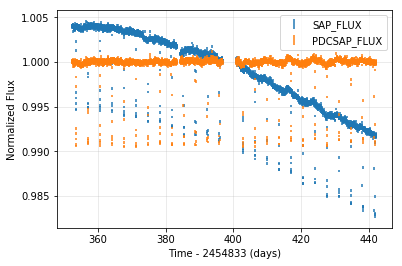

In [3]:
lcf.plot();

We can see that the PDCSAP flux is flatter. To work more with this data we must choose which type of flux we want to work with. Let's choose PDCSAP flux:

In [4]:
pdcsap = lcf.PDCSAP_FLUX

You can choose SAP flux in a similar way using
  
    sapflux = lcf.SAP_FLUX

In [5]:
lcf

KeplerLightCurveFile(KIC: 6922244)

In [6]:
pdcsap

KeplerLightCurve(KIC: 6922244)

This has created a `KeplerLightCurve` object. The only flux it contains is the PDCSAP flux. This has the same methods we used in the [previous tutorial](http://lightkurve.keplerscience.org/tutorials/what-are-lightcurves.html). For example you can check the cdpp and the meta data:

In [7]:
pdcsap.mission

'Kepler'

In [8]:
pdcsap.quarter

4

In [9]:
pdcsap.cdpp()

407.9620564266182